In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import seaborn as sns
import catboost

In [8]:
train_set = pd.read_csv('./dataset/train.csv')
train_set.T

,0,1,2,3,4,5,6,7,8,9,...,76508,76509,76510,76511,76512,76513,76514,76515,76516,76517
id,0,1,2,3,4,5,6,7,8,9,...,76508,76509,76510,76511,76512,76513,76514,76515,76516,76517
Marital status,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,5,1,1
Application mode,1,17,17,1,1,39,44,1,39,1,...,1,1,1,17,1,17,1,17,1,1
Application order,1,1,2,3,2,1,1,1,1,6,...,1,1,1,1,1,1,6,1,3,1
Course,9238,9238,9254,9500,9500,171,9085,9773,9003,9500,...,9238,9500,9773,9773,9238,9254,9254,9085,9070,9773
Daytime/evening attendance,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Previous qualification,1,1,1,1,1,19,39,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Previous qualification (grade),126.0,125.0,137.0,131.0,132.0,133.1,130.0,130.0,133.1,135.0,...,132.0,147.0,130.0,138.0,134.0,121.0,125.0,138.0,136.0,133.1
Nacionality,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mother's qualification,1,19,3,19,19,19,37,19,19,37,...,1,37,12,1,19,19,1,37,38,19


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

(array([36282.,     0.,     0.,     0.,     0., 25296.,     0.,     0.,
            0., 14940.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

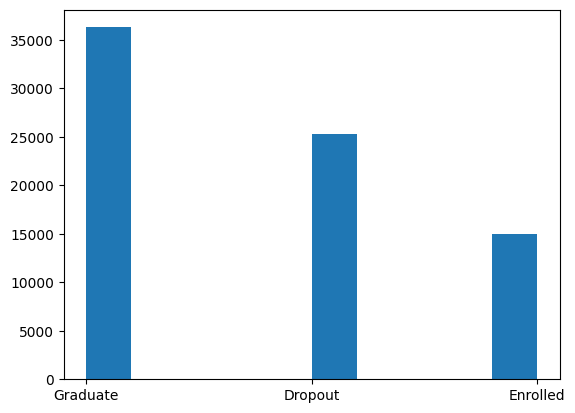

In [10]:
plt.hist(train_set['Target'])

In [11]:
train_set['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [12]:
data_dict = {
    'Graduate': 0,
    'Dropout': 1 ,
    'Enrolled': 2
}

def process_dataframe(df):
    df_copy = df.copy()
    df_copy['Target'] = list(map(lambda item: data_dict[item], df_copy['Target']))
    
    return df_copy

train_dataset = process_dataframe(train_set)
train_dataset = train_dataset.drop(['id'], axis=1)
train_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,76508,76509,76510,76511,76512,76513,76514,76515,76516,76517
Marital status,1.000000,1.00,1.00,1.00000,1.000000,1.00,1.00,1.000000,1.00,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,5.00,1.00,1.000000
Application mode,1.000000,17.00,17.00,1.00000,1.000000,39.00,44.00,1.000000,39.00,1.000000,...,1.00,1.000000,1.000000,17.000000,1.000000,17.000000,1.000,17.00,1.00,1.000000
Application order,1.000000,1.00,2.00,3.00000,2.000000,1.00,1.00,1.000000,1.00,6.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,6.000,1.00,3.00,1.000000
Course,9238.000000,9238.00,9254.00,9500.00000,9500.000000,171.00,9085.00,9773.000000,9003.00,9500.000000,...,9238.00,9500.000000,9773.000000,9773.000000,9238.000000,9254.000000,9254.000,9085.00,9070.00,9773.000000
Daytime/evening attendance,1.000000,1.00,1.00,1.00000,1.000000,1.00,1.00,1.000000,1.00,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.00,1.00,1.000000
Previous qualification,1.000000,1.00,1.00,1.00000,1.000000,19.00,39.00,1.000000,1.00,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.00,1.00,1.000000
Previous qualification (grade),126.000000,125.00,137.00,131.00000,132.000000,133.10,130.00,130.000000,133.10,135.000000,...,132.00,147.000000,130.000000,138.000000,134.000000,121.000000,125.000,138.00,136.00,133.100000
Nacionality,1.000000,1.00,1.00,1.00000,1.000000,1.00,1.00,1.000000,1.00,1.000000,...,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.00,1.00,1.000000
Mother's qualification,1.000000,19.00,3.00,19.00000,19.000000,19.00,37.00,19.000000,19.00,37.000000,...,1.00,37.000000,12.000000,1.000000,19.000000,19.000000,1.000,37.00,38.00,19.000000
Father's qualification,19.000000,19.00,19.00,3.00000,37.000000,19.00,37.00,37.000000,19.00,37.000000,...,1.00,19.000000,3.000000,19.000000,38.000000,1.000000,38.000,37.00,37.00,19.000000


<Axes: >

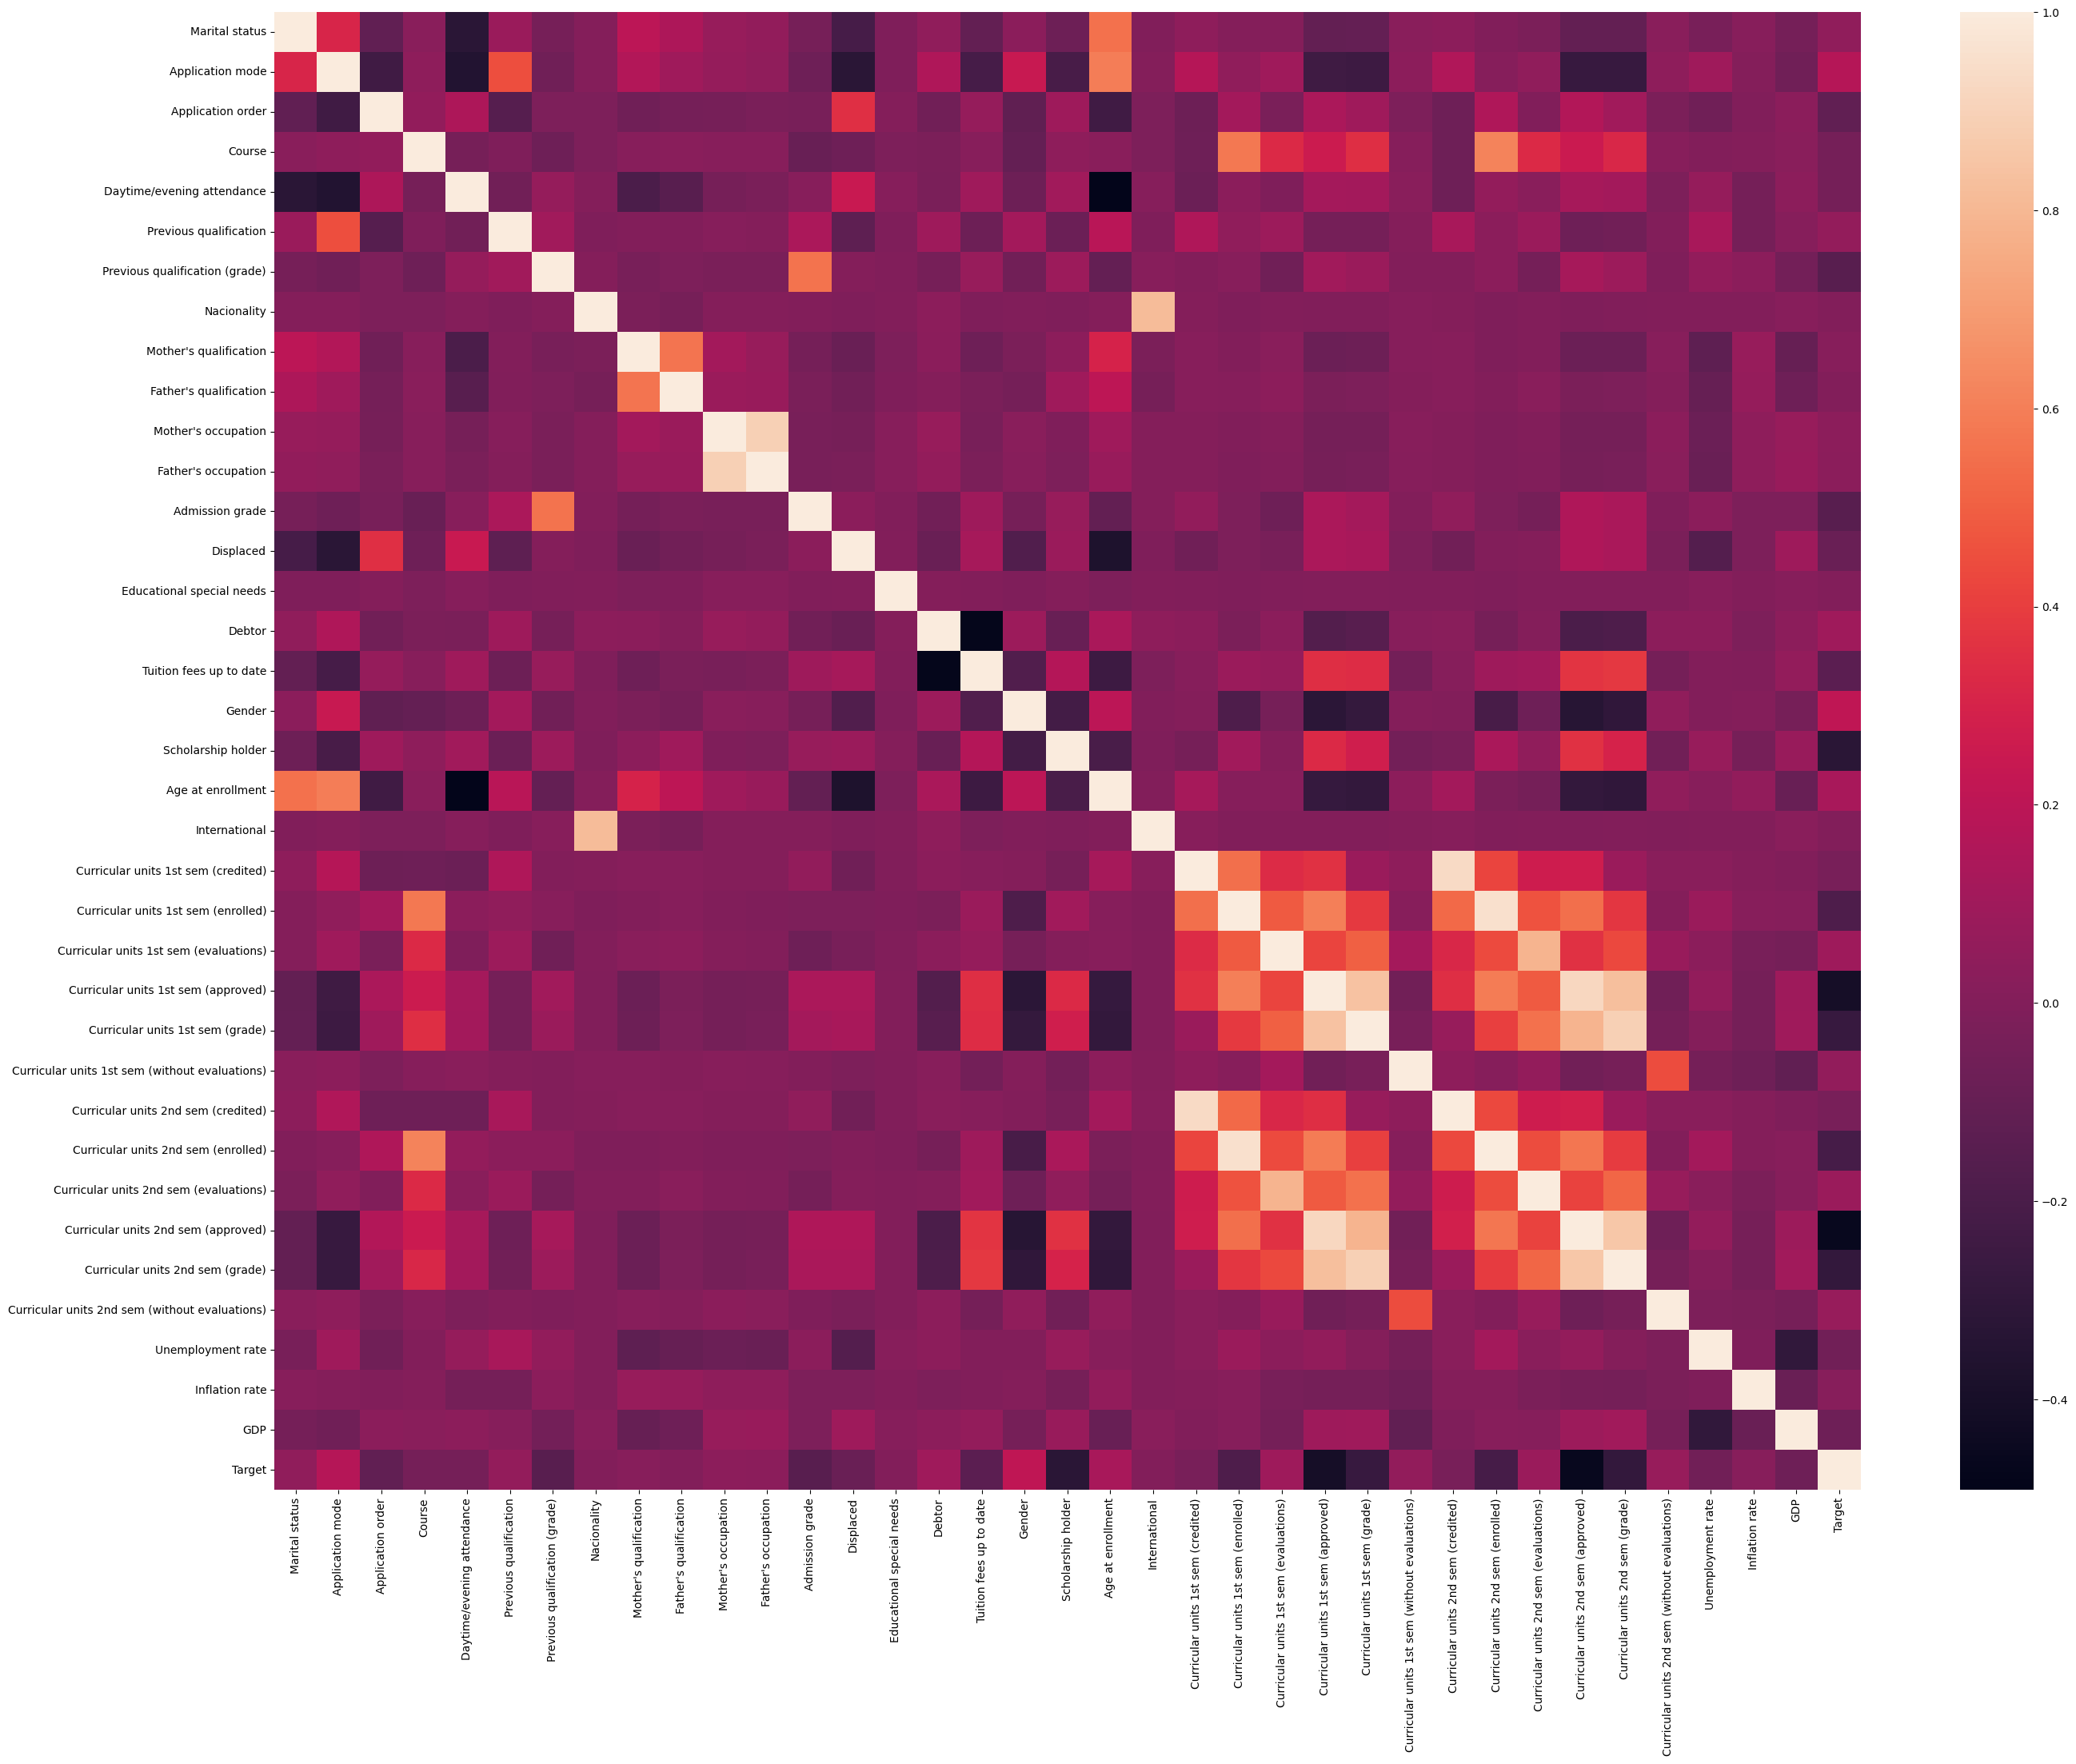

In [13]:
cor  = train_dataset.corr()

fig, ax = plt.subplots(figsize=(32,24)) 
sns.heatmap(cor, ax=ax)

In [14]:
dataset = train_dataset

lable_train = dataset['Target'].to_numpy()
lable_train

array([0, 1, 1, ..., 2, 1, 0], shape=(76518,))

In [15]:
class_weight = {
    0:  36282/76518,
    1:  25296/76518,
    2:  14940/76518,
}

In [16]:
dataset = dataset.drop(['Target'], axis=1)
data_train = dataset.to_numpy()

In [38]:
model = catboost.CatBoostClassifier(
    iterations=21000,
    learning_rate=1e-2,
    loss_function='MultiClass',
    auto_class_weights='SqrtBalanced',
    task_type="GPU",
    devices='0'
)

model

In [39]:
model.fit(data_train, lable_train)

0:	learn: 1.0881510	total: 6.69ms	remaining: 2m 20s
1:	learn: 1.0779720	total: 12.3ms	remaining: 2m 9s
2:	learn: 1.0680623	total: 18ms	remaining: 2m 6s
3:	learn: 1.0583850	total: 23.6ms	remaining: 2m 3s
4:	learn: 1.0489763	total: 29.1ms	remaining: 2m 2s
5:	learn: 1.0398060	total: 34.7ms	remaining: 2m 1s
6:	learn: 1.0308833	total: 40.4ms	remaining: 2m 1s
7:	learn: 1.0221305	total: 45.9ms	remaining: 2m
8:	learn: 1.0136145	total: 51.6ms	remaining: 2m
9:	learn: 1.0052769	total: 57ms	remaining: 1m 59s
10:	learn: 0.9971583	total: 62.6ms	remaining: 1m 59s
11:	learn: 0.9892010	total: 69.3ms	remaining: 2m 1s
12:	learn: 0.9814312	total: 74.7ms	remaining: 2m
13:	learn: 0.9738426	total: 80.2ms	remaining: 2m
14:	learn: 0.9664324	total: 85.8ms	remaining: 2m
15:	learn: 0.9591904	total: 91.3ms	remaining: 1m 59s
16:	learn: 0.9521118	total: 96.8ms	remaining: 1m 59s
17:	learn: 0.9451648	total: 102ms	remaining: 1m 58s
18:	learn: 0.9383669	total: 107ms	remaining: 1m 58s
19:	learn: 0.9317140	total: 113ms	re

In [40]:
model.score(data_train, lable_train)

np.float64(0.8917378917378918)

In [41]:
test_data = pd.read_csv('./dataset/test.csv')
test_data = test_data.drop(['id'], axis=1)
data_test = test_data.to_numpy()

In [42]:
out = model.predict(data_test)

In [43]:
pd.DataFrame({
    'id':range(76518+0, 76518+len(data_test)),
    'Target':list(map(lambda item: ['Graduate', 'Dropout', 'Enrolled'][item], out.reshape(-1)))
}).to_csv('sample_submission.csv', index=False)